In [1]:
# Once Model has been saved in H5 format, copy the path of the file and paste it on model load location within main python code

In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import save_model, load_model, Sequential
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import BatchNormalization, Dropout

In [2]:
import os
import random
import shutil
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
if not os.path.isdir("C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\valid\\"):
    os.makedirs("C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\valid")

In [4]:
emotions_list = ['angry', 'sad', 'disgust', 'fear', 'happy', 'neutral', 'surprise']
if os.path.isdir(f"C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\valid\\") is False:
    for emotion in emotions_list: 
        os.mkdir(f"C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\valid\\{emotion}")
        valid_samples = random.sample(os.listdir(path = f"C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\train\\{emotion}"), 3)
        for j in valid_samples:
            shutil.move(f"C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\train\\{emotion}\\{j}", f"C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\valid\\{emotion}")

In [5]:
train_path = "C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\train\\"
test_path = "C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\test\\"

In [6]:
train_samples = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True, rescale = 1./255, validation_split = 0.2).flow_from_directory(directory=train_path, batch_size=256, target_size=(48, 48), classes=emotions_list, color_mode="grayscale")
valid_samples = ImageDataGenerator(rescale = 1./255, validation_split = 0.2,).flow_from_directory(directory=test_path, batch_size=64, target_size=(48, 48), classes=emotions_list, color_mode="grayscale")

Found 28688 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
assert train_samples.n == 28688
assert valid_samples.n == 7178

In [8]:
assert train_samples.num_classes == valid_samples.num_classes

In [9]:
images, labels = next(train_samples)
def plot_Image(imag_array):
    fig, axes = plt.subplots(5, 5, figsize=(5, 5))
    axes = axes.flatten()
    for imag, ax in zip(imag_array, axes):
        ax.imshow(imag)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Importing and Training Model

In [10]:
Model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(48, 48, 1)),
    BatchNormalization(),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(units=256, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=128, activation="relu"),
    Dense(units=7, activation="softmax"),
])

In [11]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                        

In [12]:
Model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
Callbacks = ModelCheckpoint(filepath="D:\\Emotion Models\\model_weights.h5", monitor="val_accuracy", save_best_only=True, save_weights_only="True", mode='max', verbose=1)

In [14]:
Model.fit(train_samples, batch_size=10, epochs=50, validation_data=valid_samples, verbose=2, callbacks=[Callbacks])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.17177, saving model to D:\Emotion Models\model_weights.h5
113/113 - 180s - loss: 2.5203 - accuracy: 0.1659 - val_loss: 1.9305 - val_accuracy: 0.1718 - 180s/epoch - 2s/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.17177
113/113 - 183s - loss: 2.0460 - accuracy: 0.2233 - val_loss: 2.1540 - val_accuracy: 0.1718 - 183s/epoch - 2s/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.17177
113/113 - 183s - loss: 1.9757 - accuracy: 0.2343 - val_loss: 2.1139 - val_accuracy: 0.1718 - 183s/epoch - 2s/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.17177 to 0.22262, saving model to D:\Emotion Models\model_weights.h5
113/113 - 178s - loss: 1.9269 - accuracy: 0.2431 - val_loss: 1.9395 - val_accuracy: 0.2226 - 178s/epoch - 2s/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.22262 to 0.25926, saving model to D:\Emotion Models\model_weights.h5
113/113 - 177s - loss: 1.8965 - accuracy: 0.2487 - val_loss: 2.0

113/113 - 178s - loss: 1.1963 - accuracy: 0.5435 - val_loss: 1.1004 - val_accuracy: 0.5794 - 178s/epoch - 2s/step
Epoch 39/50

Epoch 39: val_accuracy improved from 0.57941 to 0.58484, saving model to D:\Emotion Models\model_weights.h5
113/113 - 177s - loss: 1.1839 - accuracy: 0.5497 - val_loss: 1.0960 - val_accuracy: 0.5848 - 177s/epoch - 2s/step
Epoch 40/50

Epoch 40: val_accuracy did not improve from 0.58484
113/113 - 178s - loss: 1.1791 - accuracy: 0.5532 - val_loss: 1.1053 - val_accuracy: 0.5833 - 178s/epoch - 2s/step
Epoch 41/50

Epoch 41: val_accuracy did not improve from 0.58484
113/113 - 181s - loss: 1.1734 - accuracy: 0.5512 - val_loss: 1.1012 - val_accuracy: 0.5783 - 181s/epoch - 2s/step
Epoch 42/50

Epoch 42: val_accuracy improved from 0.58484 to 0.59320, saving model to D:\Emotion Models\model_weights.h5
113/113 - 178s - loss: 1.1601 - accuracy: 0.5579 - val_loss: 1.0687 - val_accuracy: 0.5932 - 178s/epoch - 2s/step
Epoch 43/50

Epoch 43: val_accuracy did not improve from 0

In [20]:
from tensorflow.keras.models import save_model
Model.save("D:\\model_weights.h5")

C:\Users\Vivek K N\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from tensorflow.keras.models import load_model
model = load_model("D:\\model_weights.h5")

1/1 [==============================] - 0s 126ms/step
The image is of disgust


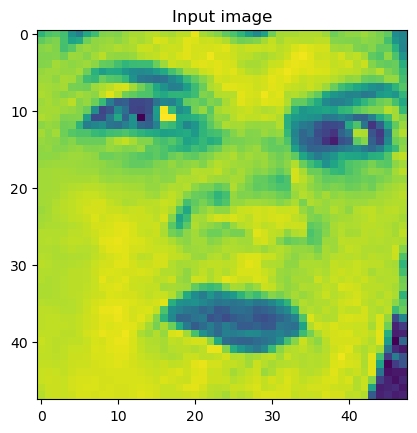

In [49]:
path = "C:\\Users\\Vivek K N\\Images Dataset\\Human Emotions\\valid\\disgust\\Training_27502021.jpg"
image = load_img(path, target_size=(48, 48), color_mode='grayscale')
i = img_to_array(image)/255.0
input_array = np.array([i])

pred = np.argmax(model.predict(input_array))
print(f"The image is of {emotions_list[pred]}")
plt.imshow(input_array[0])
plt.title("Input image")
plt.show()